# SHAP Decision Plots

SHAP decision plots show how complex models arrive at their predictions (i.e., how models make decisions). This notebook illustrates decision plot features and use cases with simple examples.

REF: https://shap.github.io/shap/notebooks/plots/decision_plot.html

Note: You'll need Lightgbm.  https://lightgbm.readthedocs.io/en/latest/Installation-Guide.html#linux

In [118]:
import matplotlib.pyplot as plt
import numpy as np
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from ucimlrepo import fetch_ucirepo 

# Init js.
shap.initjs()

In [124]:
# https://archive.ics.uci.edu/dataset/94/spambase
spam = fetch_ucirepo(id=94)  # Spam

X = spam.data.features 
y = spam.data.targets 

In [141]:
random_state = 1234
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=random_state
)

y_train = y_train.to_numpy().reshape(1, -1)[0]
y_test = y_test.to_numpy().reshape(1, -1)[0]

clf = RandomForestClassifier().fit(X_train, y_train)

print("Accuracy: ", clf.score(X_test, y_test))

Accuracy:  0.9511400651465798


In [154]:
explainer = shap.TreeExplainer(clf)
expected_value = explainer.expected_value[1]

shap_values = explainer.shap_values(X_test[:50])

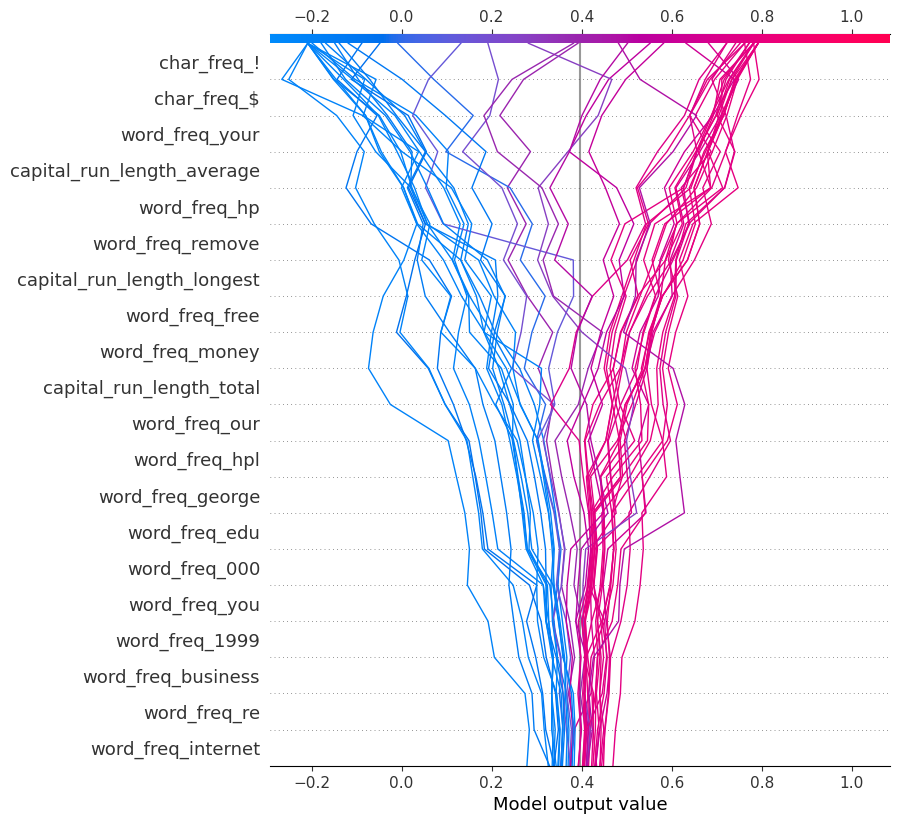

In [162]:
shap.decision_plot(expected_value, shap_values[0], feature_names=X.columns.to_list())

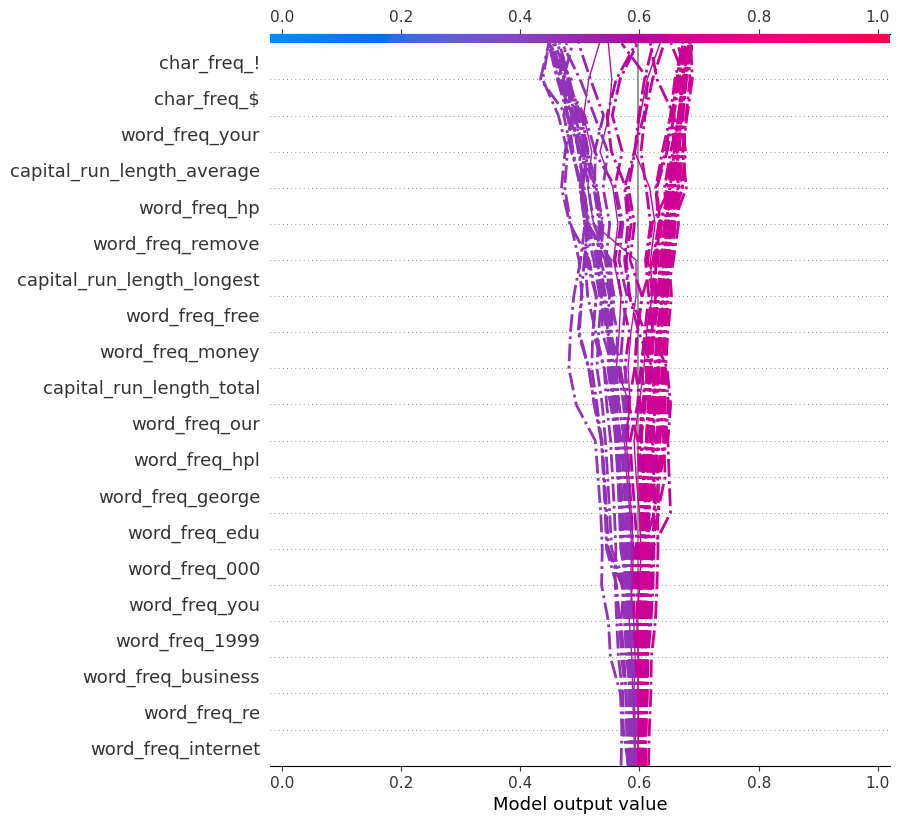

In [163]:
y_pred = (shap_values[0].sum(1) + expected_value) > 0
misclassified = y_pred != y_test[:50]
shap.decision_plot(
    expected_value, shap_values[0], X.columns.to_list(), link="logit", highlight=misclassified
)

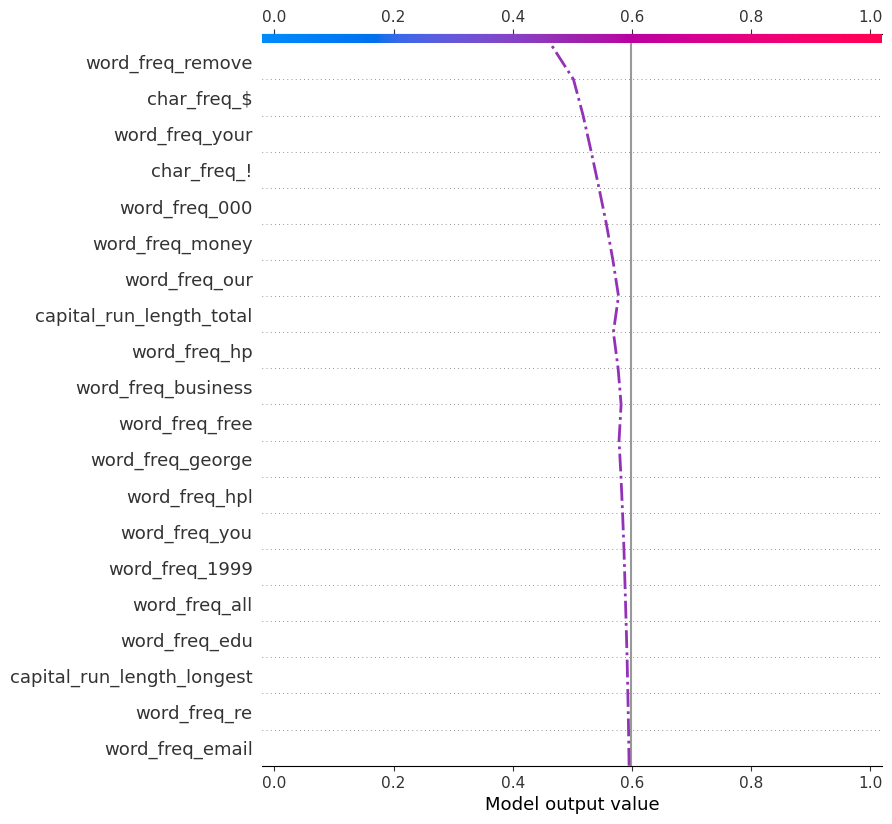

In [178]:
shap.decision_plot(
    expected_value,
    shap_values[0][misclassified][0],
    X.columns.to_list(),
    link="logit",
    highlight=0,
)

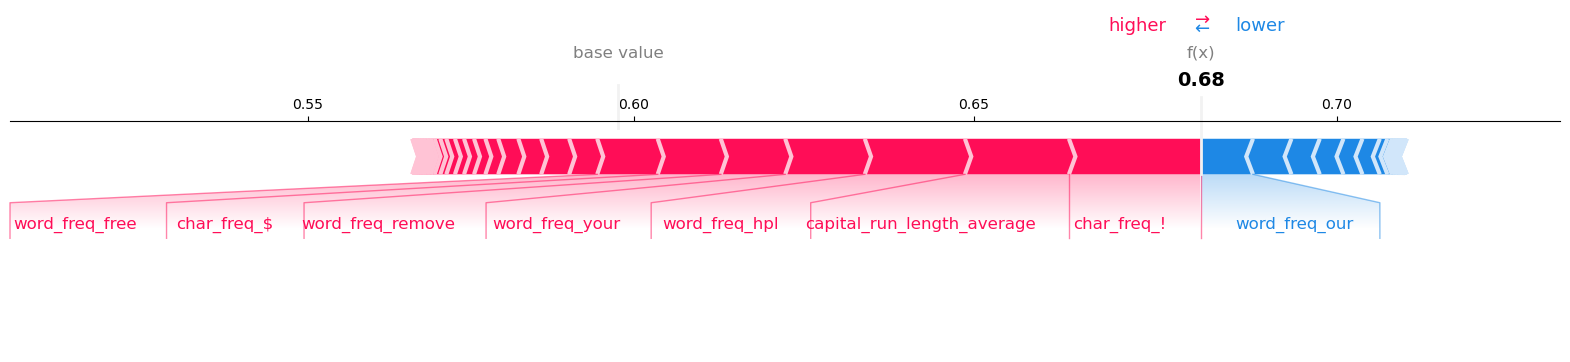

In [179]:
shap.force_plot(
    expected_value,
    shap_values[0][misclassified][1],
    X.columns.to_list(),
    link="logit",
    matplotlib=True,
)